# Expert Opinion Survey processing

# Sample code

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:
data_survey <- read_csv("data/data-original-processed/survey_results.csv") |>
  select(-comorb_hematological)


Rows: 16 Columns: 67
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (67): patient_age, patient_age_65, patient_sex, patient_weight, patient_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
data_survey_factor <- data_survey |>
  mutate(across(everything(), ~ factor(.x, levels = c(1:5))))


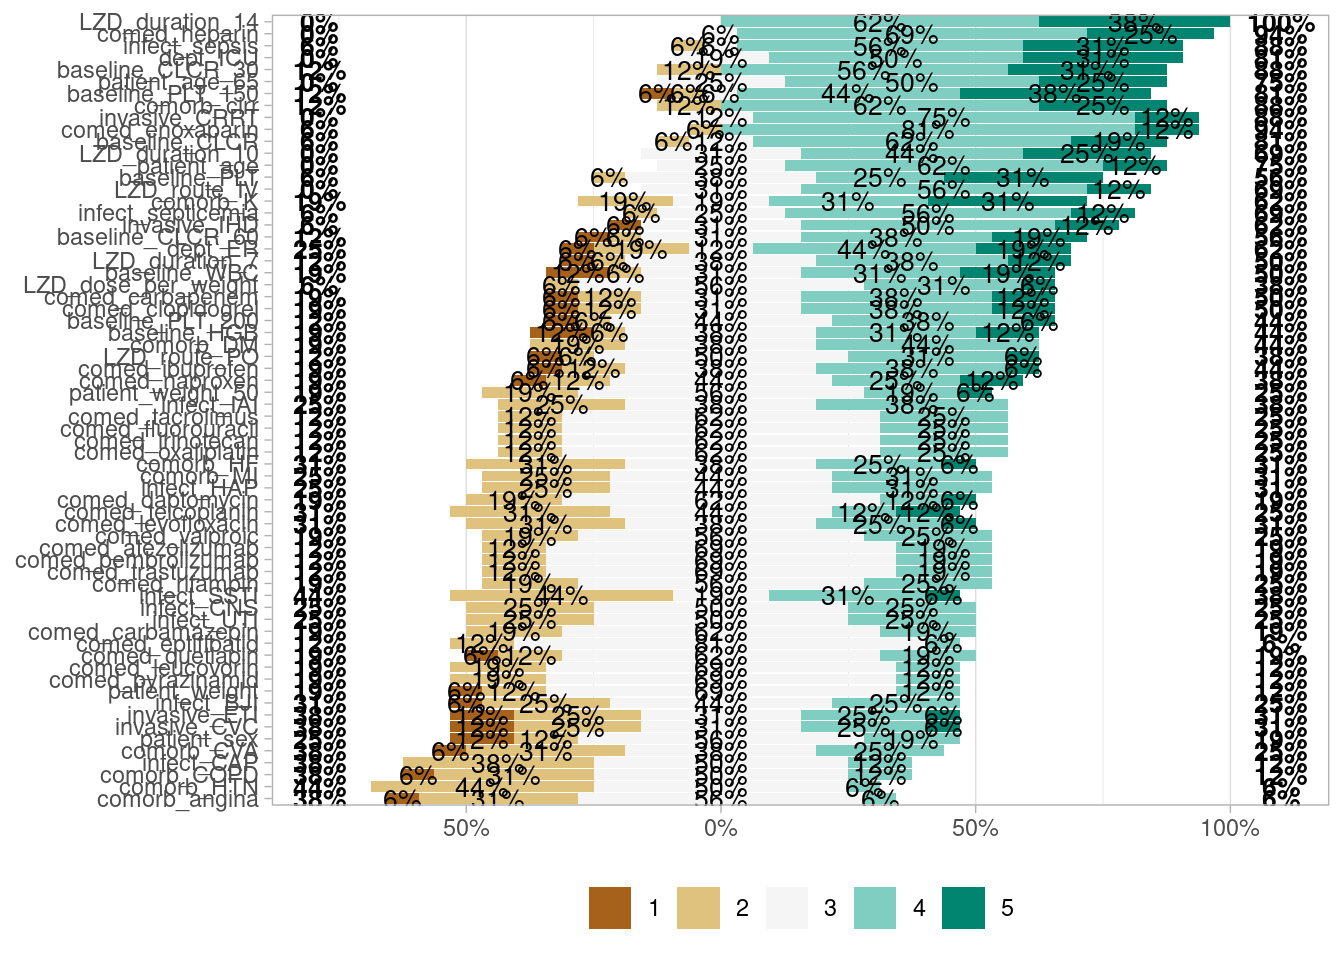

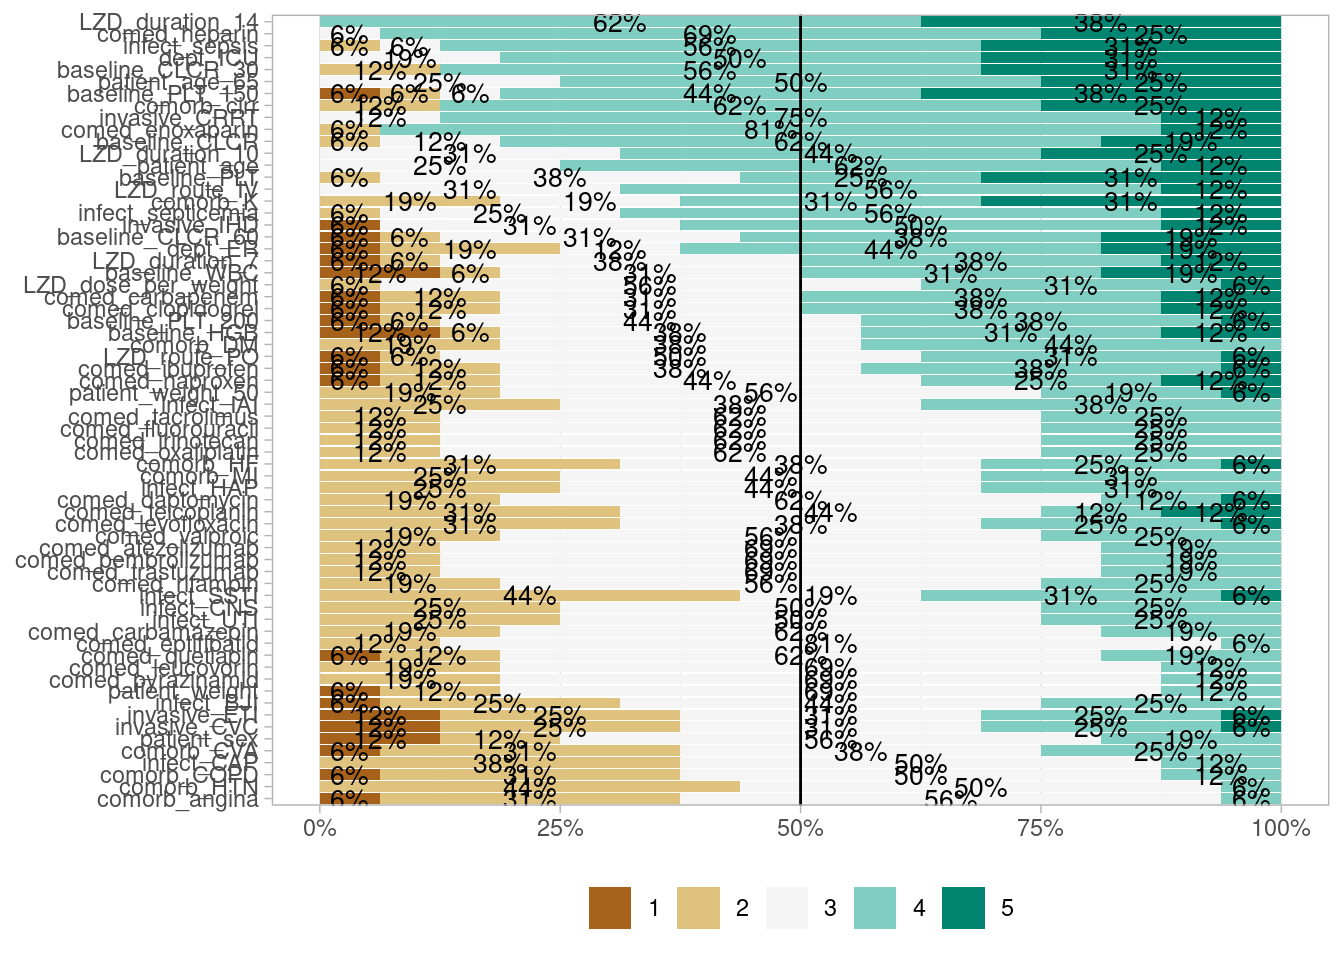

In [ ]:
gglikert(data_survey_factor, sort = "descending", sort_method = "mean")


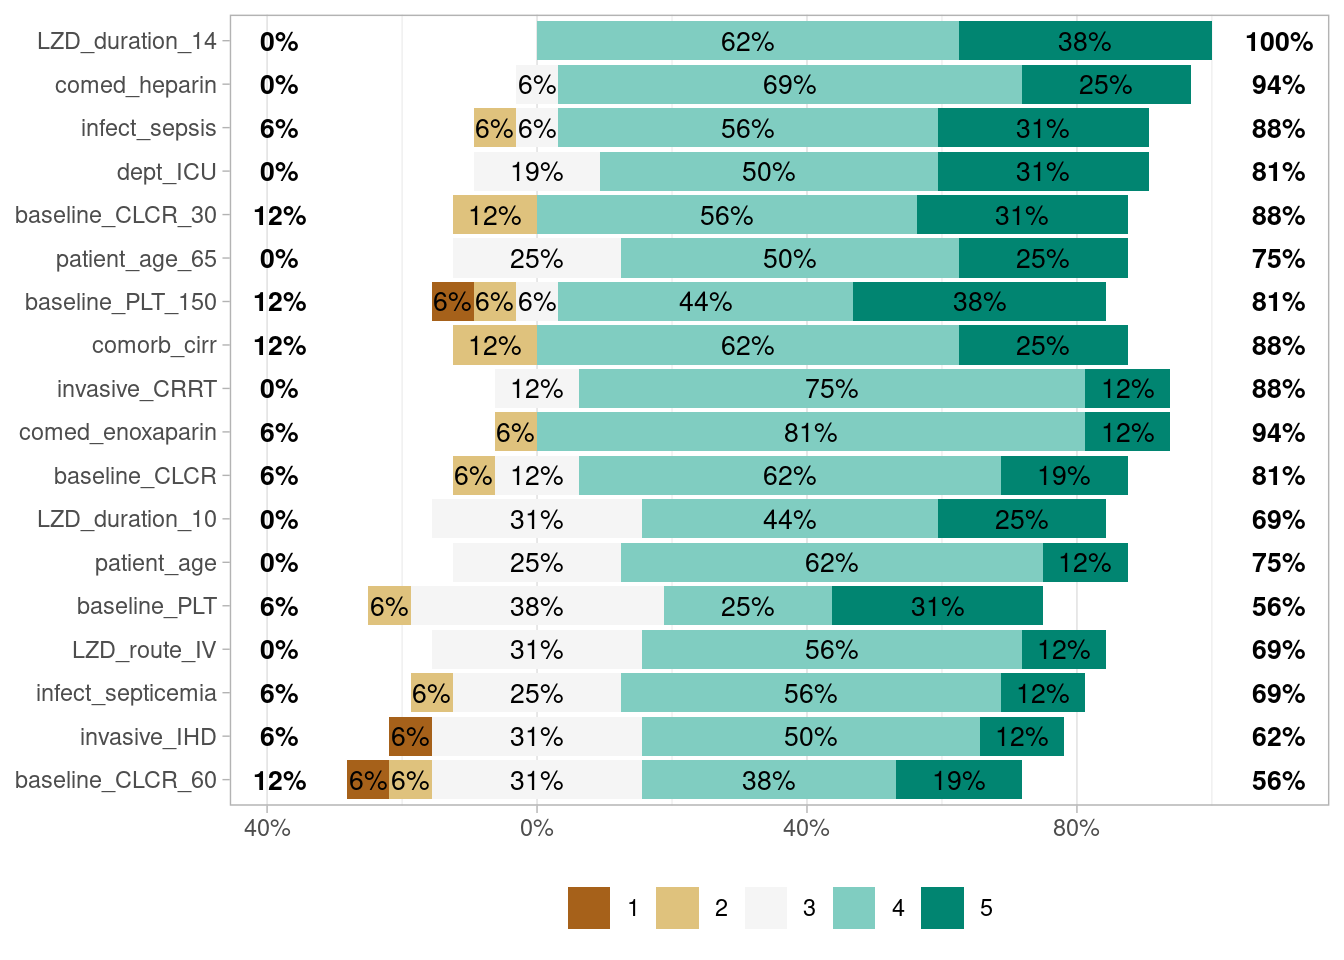

In [ ]:
table_survey_summary <- data_survey |>
  tbl_summary(type = ~"continuous", statistic = list(all_continuous() ~ "{mean} | {median} ({p25} - {p75})"))

survey_summary <- data_survey |>
  summarise(across(everything(), list(median = median, IQR = IQR, mean = mean, sd = sd), .names = "{.fn}.{.col}")) |>
  pivot_longer(
    cols = everything(),
    names_to = c(".value", "variable"),
    names_pattern = "(mean|median|IQR|sd)\\.(.*)"
  )

variables_consensus <- survey_summary |>
  filter((median >= 4 & IQR <= 1) | (mean >= 3.5 & sd <= 1)) |>
  arrange(desc(median), desc(mean)) |>
  pull(variable)

data_survey_factor |>
  select(all_of(variables_consensus)) |>
  gglikert(sort = "descending", sort_method = "mean")


In [ ]:
variables_to_screen_short <- variables_consensus

variables_to_screen_short[str_detect(variables_to_screen_short, "\\d")] <- str_remove(variables_to_screen_short[str_detect(variables_to_screen_short, "_\\d+")], "_\\d+")

variables_to_screen_short[str_detect(variables_to_screen_short, "LZD_duration")] <- "LZD_duration_14"

variables_to_screen_short <- unique(variables_to_screen_short)


In [ ]:
variables_to_screen_short_binary <- variables_consensus

variables_to_screen_short_binary[str_detect(variables_to_screen_short_binary, "\\d")] <- str_remove(variables_to_screen_short_binary[str_detect(variables_to_screen_short_binary, "_\\d+")], "_\\d+")

variables_to_screen_short_binary[str_detect(variables_to_screen_short_binary, "LZD_duration")] <- "LZD_duration_14"

variables_to_screen_short_binary[str_detect(variables_to_screen_short_binary, "baseline_CLCR")] <- "baseline_CLCR_30"

variables_to_screen_short_binary <- unique(variables_to_screen_short_binary)


In [ ]:
variables_to_screen <- survey_summary |>
  arrange(desc(median), desc(mean)) |>
  pull(variable)

variables_to_screen[str_detect(variables_to_screen, "\\d")] <- str_remove(variables_to_screen[str_detect(variables_to_screen, "_\\d+")], "_\\d+")

variables_to_screen[str_detect(variables_to_screen, "LZD_duration")] <- "LZD_duration_14"

variables_to_screen <- unique(variables_to_screen)

variables_to_screen <- variables_to_screen[1:21]

variables_to_force <- variables_to_screen[1:5]

variables_to_force_top_3 <- variables_to_screen[1:3]

variables_out <- survey_summary |>
  filter(!variable %in% variables_to_screen)


In [ ]:
variables_to_force_binary <- survey_summary |>
  arrange(desc(median), desc(mean)) |>
  pull(variable) |>
  head(5)


In [ ]:
save(variables_to_screen, file = "data/results/variables-to-screen.rda")
save(variables_to_screen_short, file = "data/results/variables-to-screen-short.rda")
save(variables_to_screen_short_binary, file = "data/results/variables-to-screen-short-binary.rda")
save(variables_to_force, file = "data/results/variables-to-force.rda")
save(variables_to_force_binary, file = "data/results/variables-to-force-binary.rda")
save(variables_to_force_top_3, file = "data/results/variables-to-force-top-3.rda")
